# A Python Quick Start Tutorial
# Lesson \#4 : Some more Matrix Operations & Plotting
## by Peter Mackenzie-Helnwein - <font color=red>SOLUTION</font>
University of Washington, Seattle, WA

pmackenz@uw.edu          
https://www.ce.washington.edu/facultyfinder/peter-mackenzie-helnwein

## Resources (reminder)

   1. matplotlib: https://matplotlib.org/
   
   1. **matplotlib gallery**: https://matplotlib.org/gallery/index.html
   
   1. numpy: https://numpy.org/doc/stable/ 
   
   1. numpy tutorials: https://numpy.org/doc/stable/user/tutorials_index.html
   
   1. Python Docs: https://docs.python.org/3/
   
   1. Python Tutorial (comprehensive): https://docs.python.org/3/tutorial/index.html
   
   1. Python Library Reference (the nitty-gritty details): https://docs.python.org/3/library/index.html
   
   1. Everything else: http://google.com
   

## Discussing questions from the self-study assignment

This section is to discuss your questions


### Exercise 1:  Linear regression (without using libraries)

**Given**:
A data set is composed of two lists: input parameters `X` and corresponsing measured answers `Y`.  A single data point, $i$, is composed as $(X_i,Y_i)\to$`(X[i],Y[i])` with $i=0,\dots,N-1$.

**Find**: The best linear fit for the provided data.  You need to develop your own implementation of the computations.  DO NOT USE regression library functions for this assignment!

**Theory**:
The data shall be approximated using a function
$$ Y=f(X,a,b):=a + b X $$
Using the _least square fit_ technique requires minimization of the cost function
$$ \mathcal{C}(a,b):=\frac{1}{2} \sum_{i=0}^{N-1} \left( f(X_i, a,b) - Y_i \right)^2  
~~~\to~~\text{min}$$

___Solution:___ 
$$ 
\frac{\partial\mathcal{C}}{\partial a} 
= \sum_{i=0}^{N-1} \left( f(X_i, a,b) - Y_i \right)
\to (\sum_{i=0}^{N-1} 1) a + (\sum_{i=0}^{N-1} X_i) b =  \sum_{i=0}^{N-1} Y_i
$$
$$ 
\frac{\partial\mathcal{C}}{\partial b} 
= \sum_{i=0}^{N-1} \left( f(X_i, a,b) - Y_i \right) X_i
\to (\sum_{i=0}^{N-1} X_i) a + (\sum_{i=0}^{N-1} X_i X_i) b =  \sum_{i=0}^{N-1} Y_i X_i
$$

**Implementation requirements**:
Try to identify sums as dot products and use `numpy.array`s to 
1. store data
2. compute dot products
3. use `numpy.linalg.solve` to solve the resulting system of equations.
4. use `matplotlib` to plot the data **and** the regression function.


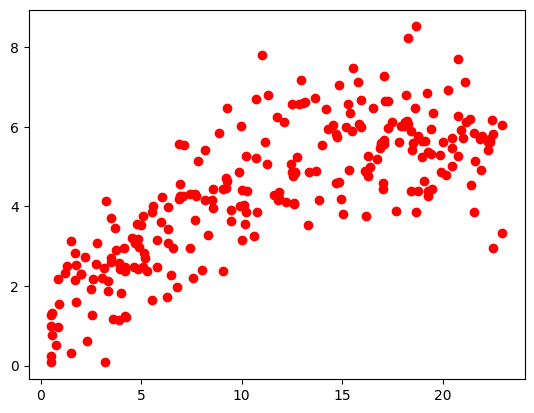

In [7]:
# The data -- will be a bit different every time you run it!
import numpy as np

N = 250
X = np.random.uniform(0.5,23,N)
Y = np.pi/4 + 5.*np.sin(X * np.pi/35) + np.random.normal(0.,1,N)

import matplotlib.pyplot as plt
plt.plot(X,Y,'or')
plt.show()

**My equations to solve**:

$$ 
    ({\bf 1}\cdot{\bf 1}) a + ({\bf 1}\cdot{\bf X}) b =  ({\bf 1}\cdot{\bf Y})
$$
$$ 
    ({\bf X}\cdot{\bf 1}) a + ({\bf X}\cdot{\bf X}) b =  ({\bf X}\cdot{\bf Y})
$$
where
$$
\begin{aligned}
{\bf X} &= [X_0,X_1,X_2,\dots,X_{N-1}]  \\
{\bf Y} &= [Y_0,Y_1,Y_2,\dots,Y_{N-1}]  \\
{\bf 1} &= [\underbrace{1,1,1,\dots,1}_{N~\text{entries}}] 
\end{aligned}
$$

**Your task**: 
Compute the coefficients and solve for the best fitting parameters

In [8]:
from numpy import array, linspace, sqrt, ones, vstack, hstack, ones_like
from numpy.linalg import solve

one = ones(len(X))      # a vector full of ones

A = array([[one@one, one@X ],\
           [  X@one,   X@X ]])

b = array([ Y@one, Y@X ])

p = solve(A,b)

ybar = p@vstack((one,X))

errvec = Y-ybar

err = sqrt((errvec@errvec)/len(X))

print("parameters p = {}".format(p))
print("error = {}".format(err))

parameters p = [2.04608052 0.20036415]
error = 1.1197507072859465


**Next task**: Compute your regression function and **add it to the plot**

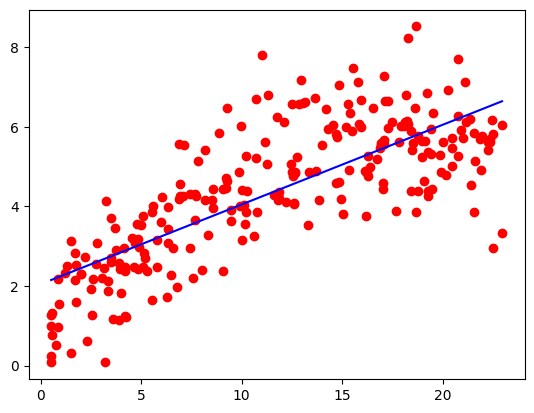

In [9]:
# linear regression

AA = vstack((ones(N),X))

A = AA@AA.T
b = AA@Y
p = solve(A,b)

# plotting

M = 10
x = linspace(X.min(),X.max(),M)
AB = vstack((ones(M),x))

y = p@AB

y = p[0]*ones_like(x) + p[1]*x

plt.plot(X,Y,'or')
plt.plot(x,y,'-b')
plt.show()

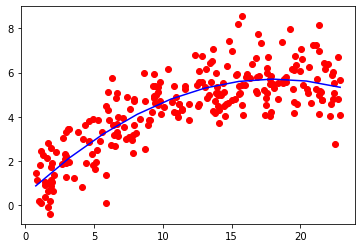

In [6]:
# linear regression

AA = vstack((ones(N),X,X*X))

A = AA@AA.T
b = AA@Y
p = solve(A,b)

# plotting

M = 10
x = linspace(X.min(),X.max(),M)
AB = vstack((ones_like(x),x,x*x))

y = p@AB

plt.plot(X,Y,'or')
plt.plot(x,y,'-b')
plt.show()

In [7]:
AB.T

array([[  1.        ,   0.76487655,   0.58503614],
       [  1.        ,   3.22287454,  10.38692027],
       [  1.        ,   5.68087252,  32.2723126 ],
       [  1.        ,   8.13887051,  66.24121313],
       [  1.        ,  10.59686849, 112.29362184],
       [  1.        ,  13.05486648, 170.42953875],
       [  1.        ,  15.51286446, 240.64896385],
       [  1.        ,  17.97086245, 322.95189714],
       [  1.        ,  20.42886043, 417.33833863],
       [  1.        ,  22.88685842, 523.8082883 ]])

### Exercise 2: Regression using numpy

**Resource**: https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html (scroll down to the example)

**Your task**:
Use `numpy.linalg.lstsq` to obtain a linear regression fit **and** plot it


[2.04608052 0.20036415]


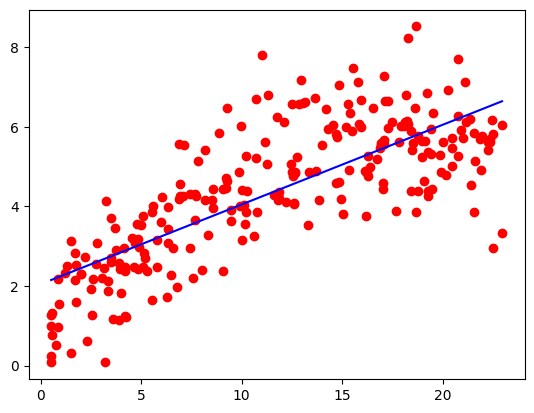

In [11]:
from numpy.linalg import lstsq

A = np.vstack((np.ones(len(X)), X)).T
p = lstsq(A,Y,rcond=None)[0]

print(p)

# ---------------
# plotting
# ---------------

N = 10
x = linspace(X.min(),X.max(),N)
a = np.vstack((np.ones(len(x)), x)).T

y = a @ p

plt.plot(X,Y,'or')
plt.plot(x,y,'-b')
plt.show()

**Your task**:
Modify the above to get a quadratic fit **and** add that one to the above plot

[ 0.43969453  0.58270129 -0.01611139]


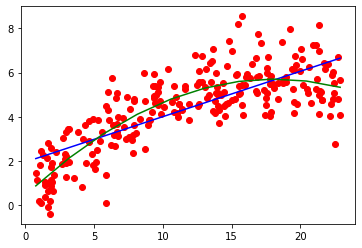

In [9]:
from numpy.linalg import lstsq

A2 = np.vstack((np.ones(len(X)), X, X*X)).T
p2 = lstsq(A2,Y,rcond=None)[0]

print(p2)

# ---------------
# plotting
# ---------------

N = 10
x = linspace(X.min(),X.max(),N)
a = np.vstack((np.ones(len(x)), x)).T
a2 = np.vstack((np.ones(len(x)), x, x*x)).T

y  =  a @ p
y2 = a2 @ p2

plt.plot(X,Y,'or')
plt.plot(x,y,'-b')
plt.plot(x,y2,'-g')
plt.show()

### Exercise 3: 

**Resources**:
1. **matplotlib gallery**: https://matplotlib.org/3.1.1/gallery/index.html


**Your task**:
1. A landscape shall be descrobed by the function
$$
 z = (x-1)^2 - 3 x y + 0.2 (y-2)^2
$$
where $z$ is the elevation. Plot a map (`contour plot`) over $-2<x<6$ and $-3<y<3$.
_Make sure axis scale equally (avoid distortion)_

In [51]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt


delta = 0.025
x = np.arange(-2.0, 6.0, delta)
y = np.arange( -3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z = (X-1)**2 - 3*X*Y + 0.2*(Y-1)**2

Text(0.5, 1.0, 'Map to my landscape')

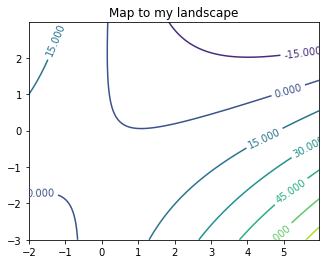

In [58]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_aspect('equal')
ax.set_title('Map to my landscape')

2. Add gradient vectors to the contour plot.  These will indicate directions of steepest ascent.

**Hint**: don't plot more than 10x10 vectors.  You may need a second grid for that. 

**Resource**: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.quiver.html

Text(0.5, 1.0, 'Map to my landscape')

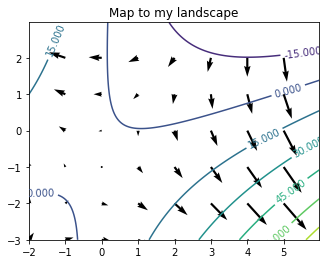

In [57]:
# create a coarser grid

delta = 1.0
s = np.arange(-2.0, 6.0, delta)
t = np.arange( -3.0, 3.0, delta)
S, T = np.meshgrid(s,t)

ZX = 2*(S-1) - 3*T 
ZY = - 3*S + 0.4*(T-1)

# plotting

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=1, fontsize=10)

ax.quiver(S,T,ZX,ZY)

ax.set_aspect('equal')
ax.set_title('Map to my landscape')

## Homework questions

We can all learn from your questions!